In [1]:
import yfinance as yf

In [2]:
SET50_TICKER = yf.Ticker("^SET.BK")
SET50 = SET50_TICKER.history(period="max")
SET50.reset_index(inplace=True)
SET50["Date"] = SET50["Date"].dt.strftime("%Y-%m-%d")
SET50["id"] = "SET50"
SET50.sort_values(by="Date", inplace=True)
SET50 = SET50[["id", "Date", "Open", "High", "Low", "Close", "Volume"]]
train_set50 = SET50[:-30]
test_set50 = SET50[-30:]

In [3]:
SP500_TICKER = yf.Ticker("^GSPC")
SP500 = SP500_TICKER.history(period="max")
SP500.reset_index(inplace=True)
SP500["Date"] = SP500["Date"].dt.strftime("%Y-%m-%d")
SP500["id"] = "S&P500"
SP500.sort_values(by="Date", inplace=True)
SP500 = SP500[["id", "Date", "Open", "High", "Low", "Close", "Volume"]]
train_sp500 = SP500[:-30]
test_sp500 = SP500[-30:]

In [4]:
CSI300_TICKER = yf.Ticker("000300.SS")
CSI300 = CSI300_TICKER.history(period="max")
CSI300.reset_index(inplace=True)
CSI300["Date"] = CSI300["Date"].dt.strftime("%Y-%m-%d")
CSI300["id"] = "CSI300"
CSI300.sort_values(by="Date", inplace=True)
CSI300 = CSI300[["id", "Date", "Open", "High", "Low", "Close", "Volume"]]
train_csi300 = CSI300[:-30]
test_csi300 = CSI300[-30:]

In [5]:
NI225_TICKER = yf.Ticker("^N225")
NI225 = NI225_TICKER.history(period="max")
NI225.reset_index(inplace=True)
NI225["Date"] = NI225["Date"].dt.strftime("%Y-%m-%d")
NI225["id"] = "NI225"
NI225.sort_values(by="Date", inplace=True)
NI225 = NI225[["id", "Date", "Open", "High", "Low", "Close", "Volume"]]
train_ni225 = NI225[:-30]
test_ni225 = NI225[-30:]

In [6]:
HSI_TICKER = yf.Ticker("^HSI")
HSI = HSI_TICKER.history(period="max")
HSI.reset_index(inplace=True)
HSI["Date"] = HSI["Date"].dt.strftime("%Y-%m-%d")
HSI["id"] = "HSI"
HSI.sort_values(by="Date", inplace=True)
HSI = HSI[["id", "Date", "Open", "High", "Low", "Close", "Volume"]]
train_hsi = HSI[:-30]
test_hsi = HSI[-30:]


In [7]:
import pandas as pd

train = pd.concat([train_set50, train_sp500, train_csi300, train_ni225, train_hsi])
full_train = pd.concat([SET50, SP500, CSI300, NI225, HSI])

test = pd.concat([test_set50, test_sp500, test_csi300, test_ni225, test_hsi])

In [8]:
from autogluon.timeseries import TimeSeriesDataFrame

train_data = TimeSeriesDataFrame(
    train,
    id_column="id",
    timestamp_column="Date",
)

full_train_data = TimeSeriesDataFrame(
    full_train,
    id_column="id",
    timestamp_column="Date",
)

In [9]:
from autogluon.timeseries import TimeSeriesPredictor

predictor = TimeSeriesPredictor(
    prediction_length=45,
    path="Model3",
    target="Open",
    freq="D",
    eval_metric="MASE",
)

predictor.fit(
    train_data,
    presets="best_quality",
)

Beginning AutoGluon training...
AutoGluon will save models to 'Model3'
=================== System Info ===================
AutoGluon Version:  1.0.0
Python Version:     3.11.8
Operating System:   Darwin
Platform Machine:   arm64
Platform Version:   Darwin Kernel Version 23.4.0: Wed Feb 21 21:44:43 PST 2024; root:xnu-10063.101.15~2/RELEASE_ARM64_T6000
CPU Count:          8
GPU Count:          0
Memory Avail:       6.10 GB / 16.00 GB (38.1%)
Disk Space Avail:   252.80 GB / 460.43 GB (54.9%)
Setting presets to: best_quality

Fitting with arguments:
{'enable_ensemble': True,
 'eval_metric': MASE,
 'freq': 'D',
 'hyperparameters': 'default',
 'known_covariates_names': [],
 'num_val_windows': 2,
 'prediction_length': 45,
 'quantile_levels': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
 'random_seed': 123,
 'refit_every_n_windows': 1,
 'refit_full': False,
 'target': 'Open',
 'verbosity': 2}

train_data with frequency 'None' has been resampled to frequency 'D'.
train_data contains missing v

In [27]:
predictor.refit_full()

Refitting models via `refit_full` using all of the data (combined train and validation)...
	Models trained in this way will have the suffix '_FULL' and have NaN validation score.
	This process is not bound by time_limit, but should take less time than the original `fit` call.
Fitting model: SeasonalNaive_FULL | Skipping fit via cloning parent ...
Fitting model: CrostonSBA_FULL | Skipping fit via cloning parent ...
Fitting model: NPTS_FULL | Skipping fit via cloning parent ...
Fitting model: AutoETS_FULL | Skipping fit via cloning parent ...
Fitting model: DynamicOptimizedTheta_FULL | Skipping fit via cloning parent ...
Fitting model: AutoARIMA_FULL | Skipping fit via cloning parent ...
Fitting model: RecursiveTabular_FULL | Skipping fit via cloning parent ...
Fitting model: DirectTabular_FULL | Skipping fit via cloning parent ...
Fitting model: DeepAR_FULL | Skipping fit via cloning parent ...
Fitting model: TemporalFusionTransformer_FULL | Skipping fit via cloning parent ...
Fitting m

{'SeasonalNaive': 'SeasonalNaive_FULL',
 'CrostonSBA': 'CrostonSBA_FULL',
 'NPTS': 'NPTS_FULL',
 'AutoETS': 'AutoETS_FULL',
 'DynamicOptimizedTheta': 'DynamicOptimizedTheta_FULL',
 'AutoARIMA': 'AutoARIMA_FULL',
 'RecursiveTabular': 'RecursiveTabular_FULL',
 'DirectTabular': 'DirectTabular_FULL',
 'DeepAR': 'DeepAR_FULL',
 'TemporalFusionTransformer': 'TemporalFusionTransformer_FULL',
 'PatchTST': 'PatchTST_FULL',
 'WeightedEnsemble': 'WeightedEnsemble_FULL'}

In [9]:
from autogluon.timeseries import TimeSeriesPredictor

predictor = TimeSeriesPredictor.load("Model3")

In [10]:
test_data = TimeSeriesDataFrame(
    test,
    id_column="id",
    timestamp_column="Date",
)

In [12]:
test_data

Open          High           Low         Close  \
item_id timestamp                                                            
SET50   2024-02-07   1400.199951   1402.650024   1394.020020   1400.020020   
        2024-02-08   1399.400024   1403.800049   1388.109985   1388.599976   
        2024-02-09   1389.920044   1391.750000   1385.020020   1388.369995   
        2024-02-12   1389.540039   1392.469971   1386.280029   1389.300049   
        2024-02-13   1391.699951   1397.800049   1390.400024   1391.729980   
...                          ...           ...           ...           ...   
HSI     2024-03-14  17120.539062  17209.820312  16878.109375  16961.660156   
        2024-03-15  16758.359375  16821.130859  16550.419922  16720.890625   
        2024-03-18  16690.259766  16801.640625  16641.580078  16737.119141   
        2024-03-19  16628.070312  16682.539062  16492.089844  16529.480469   
        2024-03-20  16559.009766  16654.080078  16430.119141  16564.480469   

                        Volume  
item_id timestamp               
SET50   2024-02-07     5029800  
        2024-02-08     4794100  
        2024-02-09     2843000  
        2024-02-12     3437200  
        2024-02-13     3593800  
...                        ...  
HSI     2024-03-14  2699096400  
        2024-03-15  3776694200  
        2024-03-18  2241776800  
        2024-03-19  2433582900  
        2024-03-20           0  

[150 rows x 5 columns]

In [23]:
predictor = TimeSeriesPredictor.load("Model2")

In [24]:
predictions = predictor.predict(full_train_data)

data with frequency 'None' has been resampled to frequency 'D'.
data contains missing values represented by NaN. They have been filled by carrying forward the last valid observation.


In [25]:
predictions.to_csv("assets/predictions.csv")

In [16]:
full_predictions = predictor.predict(full_train_data)

data with frequency 'None' has been resampled to frequency 'D'.
data contains missing values represented by NaN. They have been filled by carrying forward the last valid observation.


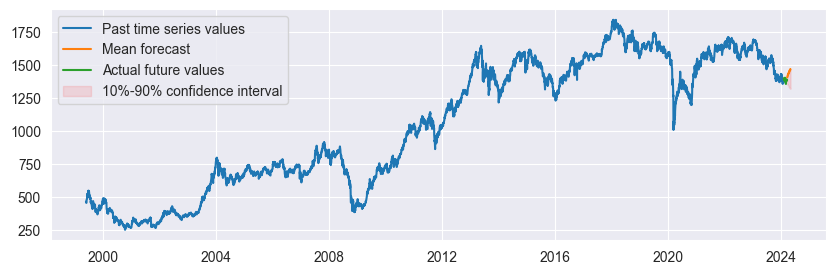

In [17]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 3))

item_id = "SET50"
y_past = train_data.loc[item_id]["Open"]
y_pred = predictions.loc[item_id]

plt.plot(y_past[600:], label="Past time series values")
plt.plot(y_pred["0.9"], label="Mean forecast")
plt.plot(test_data.loc[item_id]["Open"], label="Actual future values")

plt.fill_between(
    y_pred.index, y_pred["0.1"], y_pred["0.9"], color="red", alpha=0.1, label=f"10%-90% confidence interval"
)
plt.legend()

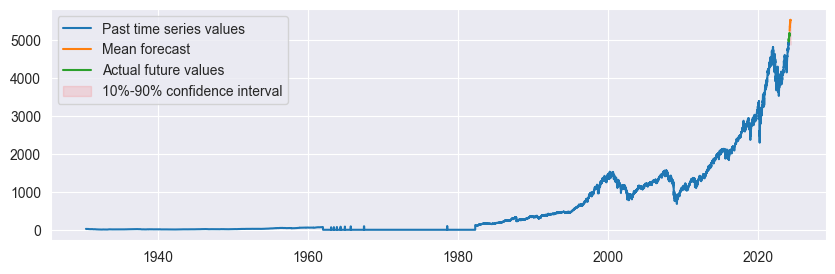

In [18]:
plt.figure(figsize=(10, 3))

item_id = "S&P500"
y_past = train_data.loc[item_id]["Open"]
y_pred = predictions.loc[item_id]

plt.plot(y_past[600:], label="Past time series values")
plt.plot(y_pred["mean"], label="Mean forecast")
plt.plot(test_data.loc[item_id]["Open"], label="Actual future values")

plt.fill_between(
    y_pred.index, y_pred["0.1"], y_pred["0.9"], color="red", alpha=0.1, label=f"10%-90% confidence interval"
)
plt.legend();

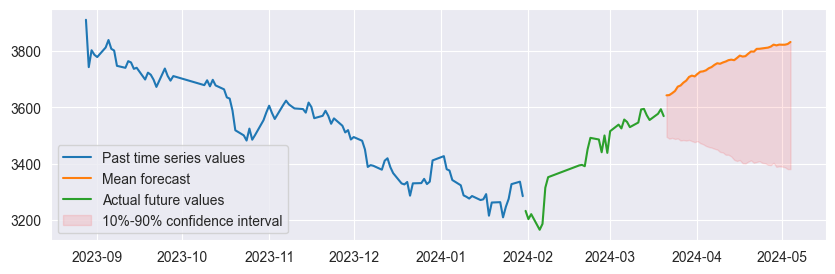

In [19]:
plt.figure(figsize=(10, 3))

item_id = "CSI300"
y_past = train_data.loc[item_id]["Open"]
y_pred = predictions.loc[item_id]

plt.plot(y_past[600:], label="Past time series values")
plt.plot(y_pred["0.9"], label="Mean forecast")
plt.plot(test_data.loc[item_id]["Open"], label="Actual future values")

plt.fill_between(
    y_pred.index, y_pred["0.1"], y_pred["0.9"], color="red", alpha=0.1, label=f"10%-90% confidence interval"
)
plt.legend();

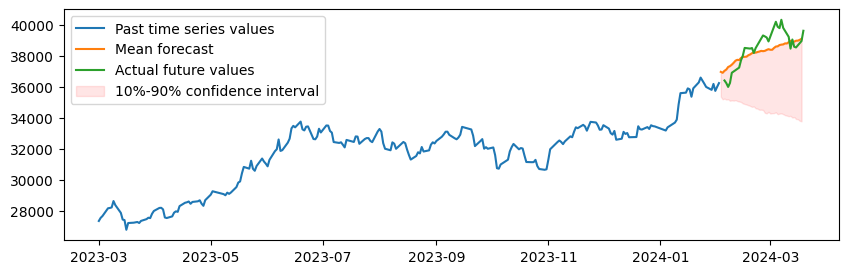

In [34]:
plt.figure(figsize=(10, 3))

item_id = "NI225"
y_past = train_data.loc[item_id]["Open"]
y_pred = predictions.loc[item_id]

plt.plot(y_past[14300:], label="Past time series values")
plt.plot(y_pred["0.9"], label="Mean forecast")
plt.plot(test_data.loc[item_id]["Open"], label="Actual future values")

plt.fill_between(
    y_pred.index, y_pred["0.1"], y_pred["0.9"], color="red", alpha=0.1, label=f"10%-90% confidence interval"
)
plt.legend();

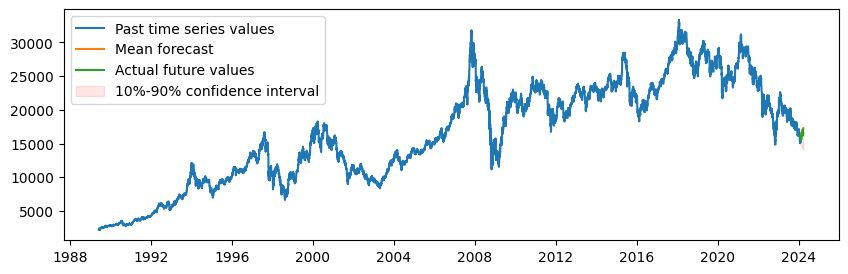

In [35]:
plt.figure(figsize=(10, 3))

item_id = "HSI"
y_past = train_data.loc[item_id]["Open"]
y_pred = predictions.loc[item_id]

plt.plot(y_past[600:], label="Past time series values")
plt.plot(y_pred["0.9"], label="Mean forecast")
plt.plot(test_data.loc[item_id]["Open"], label="Actual future values")

plt.fill_between(
    y_pred.index, y_pred["0.1"], y_pred["0.9"], color="red", alpha=0.1, label=f"10%-90% confidence interval"
)
plt.legend();